# Dollar bars alternate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
df = pd.read_csv("../data/BTCUSDT-trades-100.csv")

In [13]:
def dollar_bars(df, column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[column]
    ts = 0
    idx = []
    for i, x in enumerate(t):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [14]:
dv_bar_df = dollar_bar_df(df, 'p', 100_000)

In [15]:
dv_bar_df

,a,p,q,f,l,T,m,M
2,500000002,40101.06,0.003567,556555240,556555240,1610164456730,True,True
5,500000005,40100.71,0.170785,556555243,556555245,1610164456950,False,True
8,500000008,40101.05,0.000700,556555248,556555248,1610164457580,False,True
11,500000011,40101.04,0.009236,556555251,556555251,1610164457858,True,True
14,500000014,40098.11,0.005000,556555254,556555254,1610164458152,False,True
...,...,...,...,...,...,...,...,...
4999980,504999980,33272.93,0.002973,562215947,562215947,1610349967981,False,True
4999984,504999984,33270.64,0.000896,562215951,562215951,1610349968151,False,True
4999988,504999988,33270.63,0.003445,562215955,562215955,1610349968172,True,True
4999992,504999992,33268.81,0.116023,562215959,562215959,1610349968251,True,True


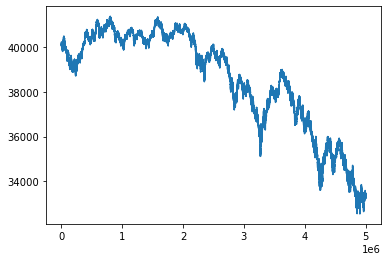

In [16]:
plt.plot(dv_bar_df.p)